In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv', encoding='utf-8')

# **데이터 살펴보기**

In [ ]:
display(data)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
print(data.isnull().sum()) #결측치는 없음 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


1    508
0    410
Name: HeartDisease, dtype: int64


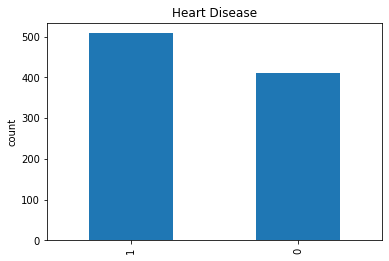

In [ ]:
#종속변수의 빈도수를 시각화함---> 골고루 잘 분포되었음을 알 수 있음 

print(data['HeartDisease'].value_counts())

data['HeartDisease'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Heart Disease')
plt.show()

In [ ]:
data.describe()  #RestingBP와 콜레스테롤 최소값이 0인 것을 확인 --> 이상치

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#RestingBP와 콜레스테롤 값 중에 0인 것을 제거하고 새로운 데이터 프레임 만들기
data1=data[data.RestingBP != 0]
data1=data1[data.Cholesterol != 0] 

<ipython-input-8-6b24c2a4c567>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data1=data1[data.Cholesterol != 0]


In [ ]:
data1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,133.022788,244.635389,0.167560,140.226542,0.901609,0.477212
std,9.505888,17.282750,59.153524,0.373726,24.524107,1.072861,0.499816
min,28.000000,92.000000,85.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,120.000000,207.250000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,140.000000,275.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#RestingBP 값 중 0인 값을 제거하고 정한 평균값(133.022788)으로 대체
#Cholestero1 값 중 0인 값을 제거하고 정한 평균값(244.635389)으로 대체
data = data.replace({'RestingBP' : 0},133.022788)
data = data.replace({'Cholesterol' : 0},244.635389)

In [ ]:
data.describe()  #RestingBP과 Cholesterol의 변수들의 이상치(0인 값)들을 각각의 평균값으로 대체 

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.541419,244.635389,0.233115,136.809368,0.887364,0.553377
std,9.432617,17.989939,53.318029,0.423046,25.460334,1.066570,0.497414
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
X1=data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]   #원핫인코딩을 실행할 범주형 변수들만 추출 

In [ ]:
X1.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
X1_dum=pd.get_dummies(X1)

In [ ]:
X1_dum  #범주형 변수들의 원핫인코딩 실행 결과 

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
y=data[['HeartDisease']]

In [ ]:
y.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [ ]:
X2=data[['Age' , 'RestingBP', 'Cholesterol'	, 'MaxHR',	'Oldpeak', 'FastingBS']]

In [ ]:
heart=pd.concat([X1_dum, X2, y], axis=1)

In [ ]:
display(heart) #머신러닝 모델에 적용할 최종 데이프레임 

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,HeartDisease
0,0,1,0,1,0,0,0,1,0,1,...,0,0,1,40,140.0,289.0,172,0.0,0,0
1,1,0,0,0,1,0,0,1,0,1,...,0,1,0,49,160.0,180.0,156,1.0,0,1
2,0,1,0,1,0,0,0,0,1,1,...,0,0,1,37,130.0,283.0,98,0.0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,48,138.0,214.0,108,1.5,0,1
4,0,1,0,0,1,0,0,1,0,1,...,0,0,1,54,150.0,195.0,122,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,...,0,1,0,45,110.0,264.0,132,1.2,0,1
914,0,1,1,0,0,0,0,1,0,1,...,0,1,0,68,144.0,193.0,141,3.4,1,1
915,0,1,1,0,0,0,0,1,0,0,...,0,1,0,57,130.0,131.0,115,1.2,0,1
916,1,0,0,1,0,0,1,0,0,1,...,0,1,0,57,130.0,236.0,174,0.0,0,1


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sex_F              918 non-null    uint8  
 1   Sex_M              918 non-null    uint8  
 2   ChestPainType_ASY  918 non-null    uint8  
 3   ChestPainType_ATA  918 non-null    uint8  
 4   ChestPainType_NAP  918 non-null    uint8  
 5   ChestPainType_TA   918 non-null    uint8  
 6   RestingECG_LVH     918 non-null    uint8  
 7   RestingECG_Normal  918 non-null    uint8  
 8   RestingECG_ST      918 non-null    uint8  
 9   ExerciseAngina_N   918 non-null    uint8  
 10  ExerciseAngina_Y   918 non-null    uint8  
 11  ST_Slope_Down      918 non-null    uint8  
 12  ST_Slope_Flat      918 non-null    uint8  
 13  ST_Slope_Up        918 non-null    uint8  
 14  Age                918 non-null    int64  
 15  RestingBP          918 non-null    float64
 16  Cholesterol        918 non

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f403f3a5970>,
      dtype=object)

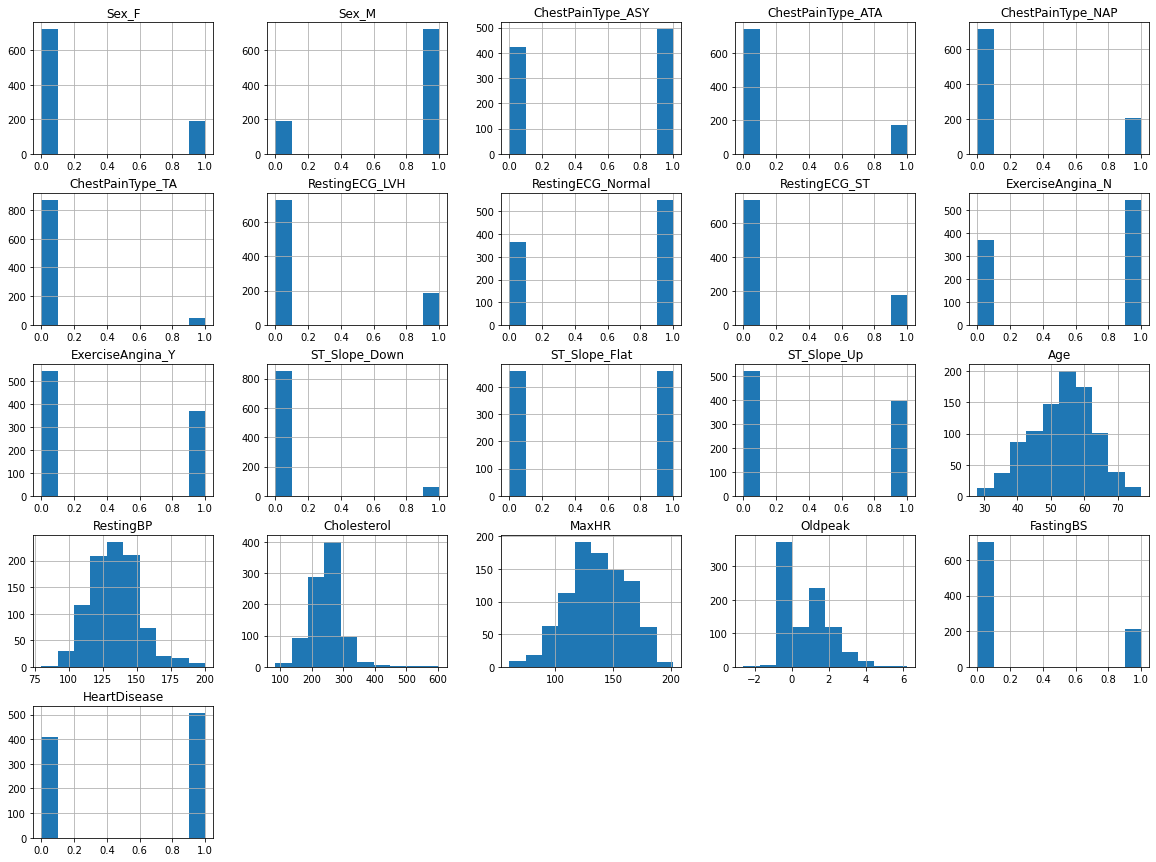

In [ ]:
pd.DataFrame(heart).hist(figsize=(20,15)) #heart의 변수들의 분포도를 시각화로 표현 

In [ ]:
X = heart.iloc[:, :-1]
y = heart.iloc[:, -1]

# **머신러닝 기법 적용**

## **의사결정나무**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.872
시험용 데이터 정확도: 0.826


In [ ]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.00811926 0.0445297  0.09510039 0.         0.         0.
 0.         0.         0.         0.         0.0760008  0.
 0.         0.65120065 0.01422262 0.01223509 0.         0.02616572
 0.07242577 0.        ]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.874


In [ ]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교
dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean()))

Accuracy
Decision tree:  [0.89855072 0.82608696 0.88405797 0.82608696 0.8115942  0.86956522
 0.73913043 0.88405797 0.83823529 0.79411765]
Random forest:  [0.92753623 0.7826087  0.91304348 0.91304348 0.8115942  0.91304348
 0.82608696 0.89855072 0.82352941 0.82352941]
Accuracy mean
Decision tree :0.837
Random forest :0.863


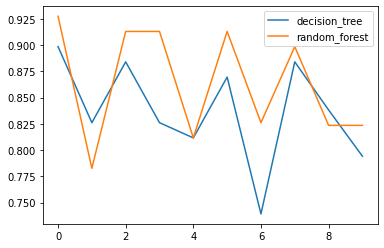

In [ ]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

dt_pred = tree.predict(X_test)
rf_pred = forest.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))

1    132
0     98
Name: HeartDisease, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.826
[[ 83  15]
 [ 25 107]]
Random forest 시험용 데이터 세트 정확도:0.874
[[ 88  10]
 [ 19 113]]


In [ ]:
from sklearn.metrics import classification_report

#recall 재현율 : 실제로 양성인 것을 양성이라고 판단할 확률
print("Decision Tree:")
print(classification_report(y_test, dt_pred, target_names=["B", "M"]))
print("Random Forest:")
print(classification_report(y_test, rf_pred, target_names=["B", "M"]))

Decision Tree:
              precision    recall  f1-score   support

           B       0.77      0.85      0.81        98
           M       0.88      0.81      0.84       132

    accuracy                           0.83       230
   macro avg       0.82      0.83      0.82       230
weighted avg       0.83      0.83      0.83       230

Random Forest:
              precision    recall  f1-score   support

           B       0.82      0.90      0.86        98
           M       0.92      0.86      0.89       132

    accuracy                           0.87       230
   macro avg       0.87      0.88      0.87       230
weighted avg       0.88      0.87      0.87       230



##**KNN 모델**

In [ ]:
heart

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,HeartDisease
0,0,1,0,1,0,0,0,1,0,1,...,0,0,1,40,140.0,289.0,172,0.0,0,0
1,1,0,0,0,1,0,0,1,0,1,...,0,1,0,49,160.0,180.0,156,1.0,0,1
2,0,1,0,1,0,0,0,0,1,1,...,0,0,1,37,130.0,283.0,98,0.0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,48,138.0,214.0,108,1.5,0,1
4,0,1,0,0,1,0,0,1,0,1,...,0,0,1,54,150.0,195.0,122,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,...,0,1,0,45,110.0,264.0,132,1.2,0,1
914,0,1,1,0,0,0,0,1,0,1,...,0,1,0,68,144.0,193.0,141,3.4,1,1
915,0,1,1,0,0,0,0,1,0,0,...,0,1,0,57,130.0,131.0,115,1.2,0,1
916,1,0,0,1,0,0,1,0,0,1,...,0,1,0,57,130.0,236.0,174,0.0,0,1


In [ ]:
heart.columns

Index(['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up',
       'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'FastingBS',
       'HeartDisease'],
      dtype='object')

###**연속형 변수 Min-Max 스케일링**###

In [ ]:
x3=heart[['Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up', 'FastingBS']]  # 연속형 변수들을 제외한 변수들
x4=heart[['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']] # min-max 스케일링에 적용할 연속형 변수들 

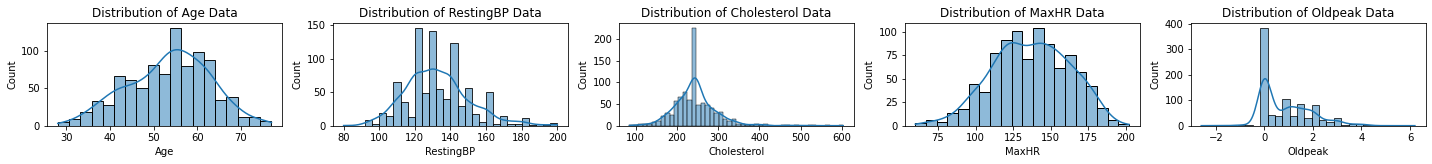

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(x4)
plt.figure(figsize=(20,20))
for i,col in enumerate(df.columns,1):
  plt.subplot(10,5,i)
  plt.title(f"Distribution of {col} Data")
  sns.histplot(df[col],kde=True)
  plt.tight_layout()
  plt.plot()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()

In [ ]:
# 연속형 변수들에 min-max 스케일링 적용 
scaler1.fit(x4)
X_scaled1=scaler1.transform(x4)
X_scaled=pd.DataFrame(X_scaled1) 

In [ ]:
X_scaled.columns=['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']  
X_scaled

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
0,0.244898,0.500000,0.393822,0.788732,0.295455
1,0.428571,0.666667,0.183398,0.676056,0.409091
2,0.183673,0.416667,0.382239,0.267606,0.295455
3,0.408163,0.483333,0.249035,0.338028,0.465909
4,0.530612,0.583333,0.212355,0.436620,0.295455
...,...,...,...,...,...
913,0.346939,0.250000,0.345560,0.507042,0.431818
914,0.816327,0.533333,0.208494,0.570423,0.681818
915,0.591837,0.416667,0.088803,0.387324,0.431818
916,0.591837,0.416667,0.291506,0.802817,0.295455


In [ ]:
heart=pd.concat([x3, X_scaled, y], axis=1)   #위에서 나눈 변수들을 합침 
heart #knn 모델에 적용할 최종 데이터프레임 

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,...,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,FastingBS,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
0,0,1,0,1,0,0,0,1,0,1,...,0,0,1,0,0.244898,0.500000,0.393822,0.788732,0.295455,0
1,1,0,0,0,1,0,0,1,0,1,...,0,1,0,0,0.428571,0.666667,0.183398,0.676056,0.409091,1
2,0,1,0,1,0,0,0,0,1,1,...,0,0,1,0,0.183673,0.416667,0.382239,0.267606,0.295455,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0.408163,0.483333,0.249035,0.338028,0.465909,1
4,0,1,0,0,1,0,0,1,0,1,...,0,0,1,0,0.530612,0.583333,0.212355,0.436620,0.295455,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,0,1,0,1,0,1,...,0,1,0,0,0.346939,0.250000,0.345560,0.507042,0.431818,1
914,0,1,1,0,0,0,0,1,0,1,...,0,1,0,1,0.816327,0.533333,0.208494,0.570423,0.681818,1
915,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0.591837,0.416667,0.088803,0.387324,0.431818,1
916,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,0.591837,0.416667,0.291506,0.802817,0.295455,1


### **X,Y 나눈 후 train, test 분류**

In [ ]:
X = heart.loc[:, "Sex_F":"Oldpeak"]
y = heart[["HeartDisease"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42, test_size=0.25)

### **모델 훈련과 세부튜닝**
**KNN모델을 적용하고 Grid/Random Search를 하여 최적의 k를 찾기**

**Random Search로 경향성 파악**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs = {'n_neighbors': randint(low=1, high=50)} 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5, return_train_score = True)
#knn모델을 가져옴. param_distribution~=param~ 원래 그 파라매터 위치 아닌데 넣어준거임 = 써서 

In [ ]:
random_search.fit(X_train, y_train) # 랜덤서치를 적용

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7eff2033e490>},
                   return_train_score=True)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_)) # 가장 좋은 파라매터

Best Parameter: {'n_neighbors': 31}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_)) 
# n_neighbors가 위에서 나온 파라매터일 때 아래 %로 좋았다. random_search라는 모델.
# training 점수

Best Cross-validity Score: 0.847


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))
# test 점수

Test set Score: 0.878


In [ ]:
result_random = pd.DataFrame(random_search.cv_results_) # 리스트 형태라 데이터프레임으로 바꿔줌

In [ ]:
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005550,0.001446,0.009847,0.001156,15,{'n_neighbors': 15},0.855072,0.876812,0.826087,0.854015,...,0.845901,0.021464,4,0.852727,0.843636,0.843636,0.847550,0.865699,0.850650,0.008231
1,0.004648,0.000072,0.009331,0.000333,31,{'n_neighbors': 31},0.862319,0.876812,0.811594,0.854015,...,0.847371,0.023009,1,0.850909,0.843636,0.854545,0.847550,0.852995,0.849927,0.003922
2,0.004427,0.000193,0.009279,0.000388,24,{'n_neighbors': 24},0.855072,0.869565,0.804348,0.846715,...,0.837184,0.025553,9,0.852727,0.845455,0.852727,0.845735,0.854809,0.850291,0.003910
3,0.004704,0.000446,0.008935,0.000295,11,{'n_neighbors': 11},0.818841,0.891304,0.818841,0.854015,...,0.838644,0.030337,8,0.860000,0.841818,0.850909,0.847550,0.863884,0.852832,0.008080
4,0.004638,0.000164,0.009536,0.000755,16,{'n_neighbors': 16},0.855072,0.862319,0.818841,0.854015,...,0.841553,0.019302,7,0.849091,0.841818,0.843636,0.851180,0.858439,0.848833,0.005900
5,0.004742,0.000131,0.009359,0.000260,5,{'n_neighbors': 5},0.840580,0.869565,0.797101,0.854015,...,0.826997,0.035940,10,0.863636,0.860000,0.858182,0.865699,0.883848,0.866273,0.009176
6,0.005678,0.002199,0.011804,0.005726,14,{'n_neighbors': 14},0.840580,0.891304,0.818841,0.861314,...,0.845911,0.027804,3,0.847273,0.841818,0.849091,0.845735,0.869328,0.850649,0.009642
7,0.004619,0.000153,0.009184,0.000185,21,{'n_neighbors': 21},0.847826,0.876812,0.818841,0.846715,...,0.844462,0.019348,6,0.849091,0.843636,0.852727,0.851180,0.856624,0.850652,0.004287
8,0.005060,0.000748,0.010842,0.001275,36,{'n_neighbors': 36},0.862319,0.876812,0.811594,0.854015,...,0.845911,0.024134,2,0.843636,0.840000,0.852727,0.849365,0.847550,0.846656,0.004437
9,0.004617,0.000268,0.009528,0.000605,33,{'n_neighbors': 33},0.862319,0.862319,0.811594,0.854015,...,0.844473,0.019807,5,0.845455,0.841818,0.854545,0.847550,0.851180,0.848110,0.004422


**random search에서 n_neighbors를 기준으로 정렬하여 경향성을 파악**

In [ ]:
df_sample = pd.DataFrame(result_random)
df_sample = df_sample.sort_values('param_n_neighbors') # param_n_neighbors 기준으로 정렬 

In [ ]:
df_sample.head(3) # param_n_neighbors 기준으로 정렬 확인

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
5,0.004742,0.000131,0.009359,0.000260,5,{'n_neighbors': 5},0.840580,0.869565,0.797101,0.854015,...,0.826997,0.035940,10,0.863636,0.860000,0.858182,0.865699,0.883848,0.866273,0.009176
3,0.004704,0.000446,0.008935,0.000295,11,{'n_neighbors': 11},0.818841,0.891304,0.818841,0.854015,...,0.838644,0.030337,8,0.860000,0.841818,0.850909,0.847550,0.863884,0.852832,0.008080
6,0.005678,0.002199,0.011804,0.005726,14,{'n_neighbors': 14},0.840580,0.891304,0.818841,0.861314,...,0.845911,0.027804,3,0.847273,0.841818,0.849091,0.845735,0.869328,0.850649,0.009642


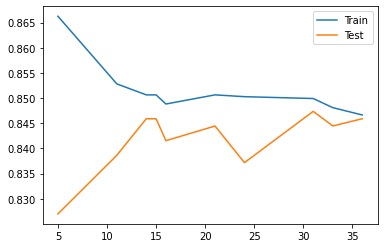

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df_sample['param_n_neighbors'], df_sample['mean_train_score'], label="Train")
plt.plot(df_sample['param_n_neighbors'], df_sample['mean_test_score'], label="Test")
plt.legend()

k의 범위를 1-50을 설정한 뒤 RandomSearch를 적용한 결과, 10이전까지 정확도가 높아지고 그 이후부터는 미세하게 떨어지는 것을 확인할 수 있었음. 즉 GridSearch에서 k의 범위를 1-10으로 설정하려고 함

**Grid Search (랜덤서치의 경향성에 따라 범위 설정)**

In [ ]:
#모델 훈련을 위해 GridSearchCV를 선언함
from sklearn.model_selection import GridSearchCV

In [ ]:
n = 10
param_list = []
for i in range(1, n+1):
  param_list.append(i)

param_grid={'n_neighbors': param_list}

In [ ]:
#KNN 알고리즘 적용을 위한 라이브러리 선언
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#KNN 알고리즘에 GridSearch를 적용함
#grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
#KNN 알고리즘에 GridSearch를 적용함
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score = True) # train score 보려면 return_train_score = True라고 해줘야 함!!!! ★

In [ ]:
#Train 데이터에 GridSearch를 적용함
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [ ]:
#가장 좋은 결과를 얻는 그리드 파라매터를 출력함
print("Best Parameter: {}".format(grid_search.best_params_)) #최적의 파라미터 결과값이 9로 나옴 

Best Parameter: {'n_neighbors': 9}


In [ ]:
#grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_)) # train


Best Cross-validity Score: 0.849


In [ ]:
#Test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test))) # test

Test set Score: 0.883


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid
# cv 5번 한 fit의 평균 시간

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004746,0.000785,0.007796,0.000081,1,{'n_neighbors': 1},0.840580,0.746377,0.811594,0.824818,...,0.789199,0.046208,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.004420,0.000146,0.007976,0.000056,2,{'n_neighbors': 2},0.818841,0.753623,0.768116,0.824818,...,0.777605,0.039031,10,0.894545,0.910909,0.885455,0.880218,0.905626,0.895351,0.011621
2,0.004752,0.000343,0.009996,0.002306,3,{'n_neighbors': 3},0.855072,0.869565,0.818841,0.832117,...,0.826944,0.038209,6,0.894545,0.885455,0.903636,0.887477,0.914701,0.897163,0.010837
3,0.006133,0.002614,0.010904,0.001965,4,{'n_neighbors': 4},0.840580,0.833333,0.768116,0.781022,...,0.799355,0.031058,8,0.867273,0.867273,0.872727,0.862069,0.900181,0.873905,0.013564
4,0.004579,0.000211,0.009344,0.000748,5,{'n_neighbors': 5},0.840580,0.869565,0.797101,0.854015,...,0.826997,0.035940,5,0.863636,0.860000,0.858182,0.865699,0.883848,0.866273,0.009176
5,0.005105,0.000977,0.008686,0.000268,6,{'n_neighbors': 6},0.818841,0.847826,0.782609,0.839416,...,0.813943,0.027880,7,0.845455,0.849091,0.856364,0.858439,0.863884,0.854646,0.006603
6,0.006681,0.003516,0.009902,0.001403,7,{'n_neighbors': 7},0.811594,0.891304,0.840580,0.846715,...,0.838623,0.031145,3,0.865455,0.858182,0.865455,0.860254,0.876588,0.865187,0.006380
7,0.004434,0.000199,0.008645,0.000200,8,{'n_neighbors': 8},0.818841,0.891304,0.826087,0.861314,...,0.838633,0.033728,2,0.856364,0.845455,0.854545,0.856624,0.872958,0.857189,0.008881
8,0.005196,0.001130,0.009139,0.000915,9,{'n_neighbors': 9},0.826087,0.898551,0.833333,0.868613,...,0.848820,0.030336,1,0.858182,0.845455,0.849091,0.852995,0.867514,0.854647,0.007696
9,0.004666,0.000240,0.009431,0.000349,10,{'n_neighbors': 10},0.826087,0.891304,0.826087,0.846715,...,0.837163,0.031603,4,0.852727,0.841818,0.852727,0.847550,0.867514,0.852467,0.008534


### **결과 저장 및 그래프 그리기**

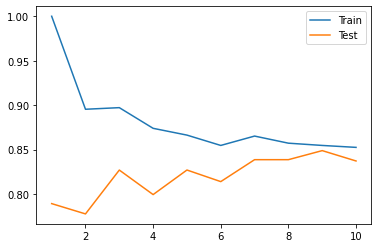

In [ ]:
#  return_train_score=True으로 해서 결과 뽑은 이유는 둘이 비교하려고!!!!!!
# true로 안해주면 mean_train_score이 없어서 그리지 못함 
# train에서 n_neighbors가 1일 때 1인 것은 자기 주변 knn에서 자기 자신만 하게 되어서 이다. 
# test가 제일 높으게 잘 나온거
import matplotlib.pyplot as plt
# x축, y축
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend() # 범례를 보여줌

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
print(grid_search.best_params_)


{'n_neighbors': 9}


In [ ]:
knn=KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors']) 

In [ ]:
knn.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn.metrics import confusion_matrix
pred_train=knn.predict(X_train)

In [ ]:
confusion_train = confusion_matrix(y_train, pred_train)

In [ ]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[246  61]
 [ 40 341]]


In [ ]:
pred_test=knn.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[ 89  14]
 [ 13 114]]


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cfreport=classification_report(y_test, pred_test)

In [ ]:
print("분류예측 레포트:\n", cfreport)

#최종 정확도가 88%로 나옴 

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       103
           1       0.89      0.90      0.89       127

    accuracy                           0.88       230
   macro avg       0.88      0.88      0.88       230
weighted avg       0.88      0.88      0.88       230

